Let us first import all the libraries that we will need

In [1]:
## load libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn.metrics as metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score,roc_auc_score,precision_recall_curve,average_precision_score,auc
from sklearn.model_selection import cross_val_score
from scipy.stats import randint as sp_randint


Setting the path where our data set is stored 

In [27]:
os.chdir("C:/Users/Garima/Downloads/Edwisor/Credit Card Fraud Detection")
data_set = pd.read_csv("creditcard.csv")

Analysisng first few head of the data set


In [3]:
data_set.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Setting data types of the features 

In [4]:
data_set.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Let us check dimension of the data set 

In [5]:
data_set.shape

(284807, 31)

In [6]:
data_set.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Missing value analysis 

We are lucky enough that our data set is free from any missing values 

In [7]:
for i in data_set.columns:
    print(i,data_set[i].isnull().sum()/data_set[i].count())

Time 0.0
V1 0.0
V2 0.0
V3 0.0
V4 0.0
V5 0.0
V6 0.0
V7 0.0
V8 0.0
V9 0.0
V10 0.0
V11 0.0
V12 0.0
V13 0.0
V14 0.0
V15 0.0
V16 0.0
V17 0.0
V18 0.0
V19 0.0
V20 0.0
V21 0.0
V22 0.0
V23 0.0
V24 0.0
V25 0.0
V26 0.0
V27 0.0
V28 0.0
Amount 0.0
Class 0.0


In [8]:
data_set.isnull().sum()## no missing values in the data set 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Fraudulent vs Non Fraudulent Class distribution 

In [9]:
data_set.Class.sum() ## 0.17% of positive class
## thus we see that our data set is highly imbalanced

492

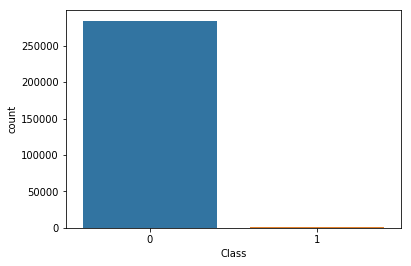

In [10]:
%matplotlib inline
sns.countplot(data_set.Class)

### Visualisations :

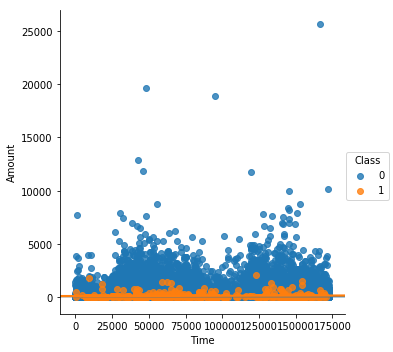

In [11]:
sns.lmplot(x="Time",y="Amount",hue = "Class",data=data_set)

#### Univariate plots:

In [ ]:
for i in range(data_set.shape[1]):
    plt.figure()
    sns.distplot(data_set.iloc[:,i],color = 'b')

In [ ]:
#data_set.groupby("Class")["V1"].plot(kind = "bar")

In [28]:
## Outlier analysis
data_set_wo_outlier = data_set.drop("Class",axis = 1)
for i in data_set_wo_outlier.columns:
    
    q75,q25 = np.percentile(data_set_wo_outlier.loc[:,i],[75,25])
    iqr = q75-q25
    
    min = q25-1.5*iqr
    max = q75+1.5*iqr
    
    data_set_wo_outlier.loc[data_set_wo_outlier[i] < min,i] = min
    data_set_wo_outlier.loc[data_set_wo_outlier[i] > max,i] = max
    
data_set_wo_outlier["Class"] = data_set["Class"]
data_set = data_set_wo_outlier

### Correlation Analysis 

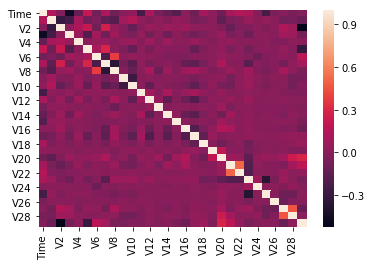

In [31]:
## Correlation analysis 
#print(data_set.corr())
sns.heatmap(data_set.corr())

### Variance inflation Factor

In [34]:
data_set.Class = data_set.Class.astype('int64')

In [35]:
print(pd.Series([variance_inflation_factor(data_set.values,i) for i in range(data_set.shape[1])],index = data_set.columns))

Time      2.896222
V1        1.686619
V2        2.279518
V3        2.147787
V4        1.549607
V5        1.924199
V6        1.493972
V7        2.808459
V8        1.550857
V9        1.506112
V10       2.428259
V11       1.655301
V12       2.823340
V13       1.043843
V14       2.311255
V15       1.046080
V16       2.388256
V17       3.801044
V18       1.599216
V19       1.132610
V20       1.453915
V21       1.581428
V22       1.457696
V23       1.376520
V24       1.034379
V25       1.237693
V26       1.022409
V27       1.394548
V28       1.433110
Amount    3.564293
Class     2.093847
dtype: float64


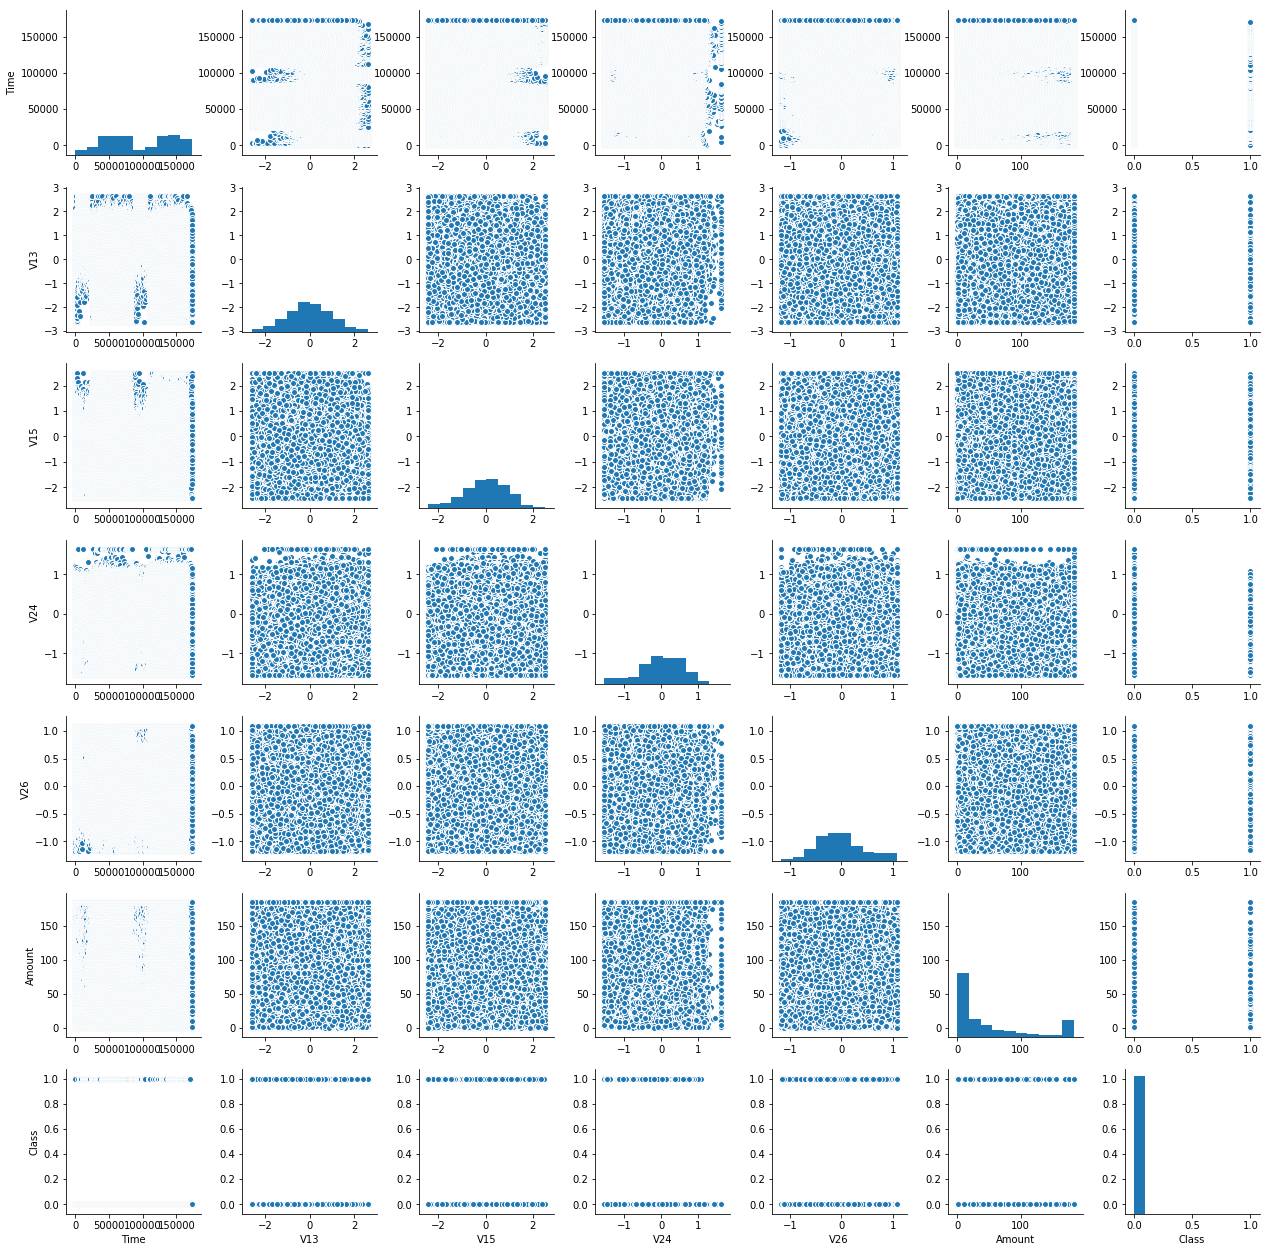

In [21]:
#sns.pairplot(data_set)## taking a lot of time

### Feature Scaling

The centering and scaling statistics of this scaler are based on percentiles and are therefore not influenced by a few number of very large marginal outliers.


In [39]:
rob_scaler = RobustScaler()
data_set.Time = rob_scaler.fit_transform(data_set.Time.values.reshape(-1,1))
data_set.Amount = rob_scaler.fit_transform(data_set.Amount.values.reshape(-1,1))

In [41]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(data_set)
train_x = train_set.drop("Class",axis = 1)
train_y = train_set.Class
test_x = test_set.drop("Class",axis = 1)
test_y = test_set.Class

In [45]:
#This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.
accuracy_cv = []
precision_cv = []
recall_cv = []
f1_cv = []
#roc_auc_cv = []
#avg_precision_cv = []
def cross_val_performance(data_set_cv,model_to_fit) :
    x = data_set_cv.drop("Class",axis = 1)
    y = data_set_cv.Class
    strat_shuffle_split = StratifiedShuffleSplit(n_splits = 5,test_size = 0.20,random_state = 1)
    ## iterating through each split and oversampling the minority class
    for train_index,test_index in strat_shuffle_split.split(x,y):
        
        train_x,test_x = x.iloc[train_index],x.iloc[test_index]
        train_y,test_y = y.iloc[train_index],y.iloc[test_index]
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), model_to_fit)
        model_fitted = pipeline.fit(train_x,train_y)
        predicted_y = model_fitted.predict(test_x)
        model_performance(test_y,predicted_y)
        
    print("Accuracy mean:",np.mean(accuracy_cv),"Precision mean:",np.mean(precision_cv),"Recall mean:",np.mean(recall_cv),"F1 mean:",np.mean(f1_cv))


In [46]:
def model_performance(actual_y,predicted_y):
    fpr, tpr, threshold = metrics.roc_curve(actual_y, predicted_y)
    roc_auc = metrics.auc(fpr, tpr)

    ## Storing metric results of all the validation iterations
    accuracy_cv.append(accuracy_score(actual_y,predicted_y))
    precision_cv.append(precision_score(actual_y,predicted_y))
    recall_cv.append(recall_score(actual_y,predicted_y))
    f1_cv.append(f1_score(actual_y,predicted_y))

    print("accuracy score:",accuracy_score(actual_y,predicted_y),"precision:",precision_score(actual_y,predicted_y),"recall:",recall_score(actual_y,predicted_y),"f1:",f1_score(actual_y,predicted_y))


In [47]:
model_LR = LogisticRegression(penalty="l1",solver = 'liblinear')
cross_val_performance(train_set,model_LR)
model_performance(test_y,model_LR.predict(test_x))

accuracy score: 0.966667446923 precision: 0.0464333781965 recall: 0.907894736842 f1: 0.0883482714469
accuracy score: 0.972121439105 precision: 0.0514883346742 recall: 0.842105263158 f1: 0.0970432145565
accuracy score: 0.968282577655 precision: 0.0480565371025 recall: 0.894736842105 f1: 0.0912139503689
accuracy score: 0.972355516023 precision: 0.0519059205191 recall: 0.842105263158 f1: 0.0977845683728
accuracy score: 0.966924931533 precision: 0.0473933649289 recall: 0.921052631579 f1: 0.0901481004507
Accuracy mean: 0.969270382248 Precision mean: 0.0490555070842 Recall mean: 0.881578947368 F1 mean: 0.0929076210392
accuracy score: 0.967191932811 precision: 0.0431211498973 recall: 0.945945945946 f1: 0.082482325216


In [48]:
model_DT = DecisionTreeClassifier(max_depth=10,criterion="gini",random_state=1)
cross_val_performance(train_set,model_DT)
model_performance(test_y,model_DT.predict(test_x))

accuracy score: 0.990800777135 precision: 0.142212189616 recall: 0.828947368421 f1: 0.242774566474
accuracy score: 0.989419723321 precision: 0.120967741935 recall: 0.789473684211 f1: 0.20979020979
accuracy score: 0.986212869549 precision: 0.102325581395 recall: 0.868421052632 f1: 0.183079056865
accuracy score: 0.988506823342 precision: 0.115027829314 recall: 0.815789473684 f1: 0.20162601626
accuracy score: 0.983801877297 precision: 0.0849056603774 recall: 0.828947368421 f1: 0.154034229829
Accuracy mean: 0.977480537699 Precision mean: 0.077621607996 Recall mean: 0.862310875469 F1 mean: 0.139847682694
accuracy score: 0.984354372068 precision: 0.0789252728799 recall: 0.846846846847 f1: 0.144393241167


In [51]:
## SVC
## kernel = linear/rbf/poly
model_SVC = SVC(kernel="linear",C=1,gamma=1)
cross_val_performance(train_set,model_SVC)
model_performance(test_y,model_SVC.predict(test_x))

accuracy score: 0.966667446923 precision: 0.0464333781965 recall: 0.907894736842 f1: 0.0883482714469
accuracy score: 0.97179373142 precision: 0.0501992031873 recall: 0.828947368421 f1: 0.0946656649136
accuracy score: 0.968493246881 precision: 0.0483641536273 recall: 0.894736842105 f1: 0.0917678812416
accuracy score: 0.971840546804 precision: 0.0509960159363 recall: 0.842105263158 f1: 0.0961682945154
accuracy score: 0.966690854615 precision: 0.0470746469401 recall: 0.921052631579 f1: 0.0895713371721
Accuracy mean: 0.983107333532 Precision mean: 0.335908400493 Recall mean: 0.832285406003 F1 mean: 0.349519313303


In [49]:
## XGBoost
model_XGBoost = XGBClassifier(silent=False, scale_pos_weight=1,learning_rate=0.01,colsample_bytree = 0.4,subsample = 0.8,
                      objective='binary:logistic', n_estimators=10,reg_alpha = 0.3,max_depth=4, gamma=10)
model_XGBoost.fit(train_x,train_y)
model_performance(train_y,model_XGBoost.predict(train_x))
model_performance(test_y,model_XGBoost.predict(test_x))

[04:31:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=4
[04:31:01] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 2 pruned nodes, max_depth=4
[04:31:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=4
[04:31:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 2 pruned nodes, max_depth=4
[04:31:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 4 pruned nodes, max_depth=4
[04:31:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 8 pruned nodes, max_depth=3
[04:31:03] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end,

In [50]:
param_RF = {"max_depth": [3, None],"max_features": sp_randint(1, 11),"min_samples_split": sp_randint(2, 11),"bootstrap": [True, False],"criterion": ["gini", "entropy"]}
model_RF = RandomizedSearchCV(RandomForestClassifier(),param_RF,cv=5)
cross_val_performance(train_set,model_RF)
model_performance(test_y,model_RF.predict(test_x))

C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

accuracy score: 0.999414807706 precision: 0.932203389831 recall: 0.723684210526 f1: 0.814814814815


C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

accuracy score: 0.999391400014 precision: 0.916666666667 recall: 0.723684210526 f1: 0.808823529412


C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

accuracy score: 0.999531846165 precision: 0.911764705882 recall: 0.815789473684 f1: 0.861111111111


C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

accuracy score: 0.999531846165 precision: 0.9375 recall: 0.789473684211 f1: 0.857142857143


C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Garima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

accuracy score: 0.999485030781 precision: 0.875 recall: 0.828947368421 f1: 0.851351351351
Accuracy mean: 0.985928046984 Precision mean: 0.381393649954 Recall mean: 0.82161034243 F1 mean: 0.390830881165
accuracy score: 0.999564618971 precision: 0.908163265306 recall: 0.801801801802 f1: 0.851674641148
